## Analysis of LR using dummy Data

In [1]:
import numpy as np 

In [23]:
data = np.loadtxt('data.csv',delimiter=',')


In [24]:
data.shape

(100, 2)

In [25]:
x = data[:,0].reshape(-1,1)
y = data[:,1].reshape(-1,1)

In [26]:
x.shape

(100, 1)

In [27]:
from sklearn import model_selection

In [28]:
X_tain, X_test, Y_train, Y_test=model_selection.train_test_split(x,y)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
obj = LinearRegression()

In [31]:
obj.fit(X_tain,Y_train)

LinearRegression()

In [33]:
obj.coef_ #m Line eq = y = mx+c 

array([[1.31361398]])

In [34]:
obj.intercept_ #c

array([7.86028163])

In [35]:
import matplotlib.pyplot as plt

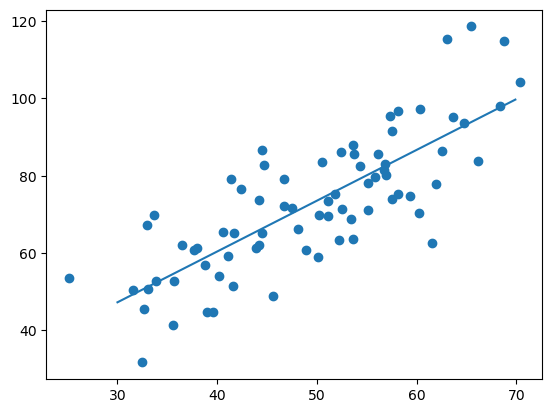

In [39]:
m = obj.coef_[0]
c = obj.intercept_[0]
x_line = np.arange(30,70,0.1)
y_line = m*x_line + c
plt.plot(x_line,y_line)
plt.scatter(X_tain.reshape(75),Y_train)
plt.show()

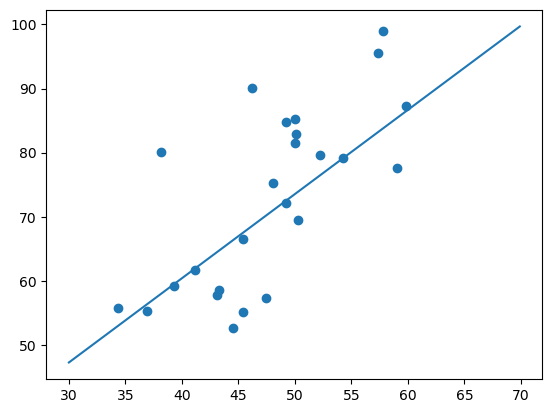

In [41]:
m = obj.coef_[0]
c = obj.intercept_[0]
x_line = np.arange(30,70,0.1)
y_line = m*x_line + c
plt.plot(x_line,y_line)
plt.scatter(X_test.reshape(25),Y_test)
plt.show()

In [42]:
X = np.array([1,2,3,4])
X.shape

(4,)

# Coefficient of Determination

In [44]:
score_on_test_data = obj.score(X_test,Y_test)
score_on_test_data

0.4708655869667038

In [46]:
score_on_train_data = obj.score(X_tain,Y_train)
score_on_train_data

0.6236407474006862

## Coding Linear Regression - 2

In [2]:
import numpy as np

In [3]:
data = np.loadtxt('data.csv',delimiter=',')

In [4]:
x = data[:,0]
y = data[:,1]

In [5]:
x.shape

(100,)

In [8]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [9]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.3)


In [10]:
def fit(x_train,y_train):
    num = (x_train*y_train).mean() - x_train.mean()*y_train.mean()
    den = (x_train**2).mean() - x_train.mean()**2
    m = num/den
    c = y_train.mean() - m*x_train.mean()
    return m,c

In [13]:
def predict(x,m,c):
    return m*x+c

def score(y_truth,y_pred):
    u= ((y_truth-y_pred)**2).sum()
    v = ((y_truth-y_truth.mean())**2).sum()
    return 1 - u/v

def cost(x,y,m,c):
    return ((y - m*x - c)**2).mean()

In [14]:
m,c = fit(x_train,y_train)

#test data
y_test_pred = predict(x_test,m,c)
print('Test Score',score(y_test,y_test_pred))

#Train data
y_train_pred = predict(x_train,m,c)
print('Train Score',score(y_train,y_train_pred))

print('M , C ',m,c)

print('Cost on training data',cost(x_train,y_train,m,c))

Test Score 0.5971753269762056
Train Score 0.5795599518992586
M , C  1.28461974121267 10.83395437966685
Cost on training data 122.65718291695725
